### Import important modules and declare important directories

In [19]:
%matplotlib inline
import pandas as pd
import json

filename = "cleaned_review_data.json"
file_directory = "/Users/robertsonwang/Desktop/Python/Yelp/"

### Load in the JSON file, note that reviews_json loads in as a list of dictionaries

In [8]:
reviews_json = json.load(open(file_directory+filename))
reviews_json[0]

{u'business_id': u'4P-vTvE6cncJyUyLh73pxw',
 u'cool': 0,
 u'date': u'2014-03-29',
 u'funny': 0,
 u'review_id': u'6-hKBi-6RC3g7Mft0c-6qw',
 u'stars': 4,
 u'text': u'This place is a area staple! Been around for years and not much has changed - I see this as a good thing! Stable and reliable!\n\nMy family goes every year for St. Pattys Day corn beef! Very nice place for a bar night dinner, or to catch up with some friends over drinks!',
 u'type': u'review',
 u'useful': 0,
 u'user_id': u'PmgqNO0-5Y3e3UoR61TD7w'}

In [13]:
#For each of the entries in the review list, 
#we can treat it like a dictionary and call specific portions of that dictionary
print reviews_json[0]['text']
print reviews_json[0]['stars']

This place is a area staple! Been around for years and not much has changed - I see this as a good thing! Stable and reliable!

My family goes every year for St. Pattys Day corn beef! Very nice place for a bar night dinner, or to catch up with some friends over drinks!
4


In [9]:
#We have about 2 million reviews
len(reviews_json)

1951815

In [24]:
#This is way too many. We will only focus on a the first 1000 of these reviews
review_subset = reviews_json[0:1000]

#### Now, let's create two lists: 
* One that holds all the reviews 
* One that holds all the ratings

In [25]:
reviews = []
stars = []
for review in review_subset:
    reviews.append(review['text'])
    stars.append(review['stars'])
print reviews[1]
print stars[1]

Got my mojo back after having a few of their appetite teasers. Love LPW for a no-frills bite to eat.
4


#### Let's plot the distribution of the ratings of this subset of reviews

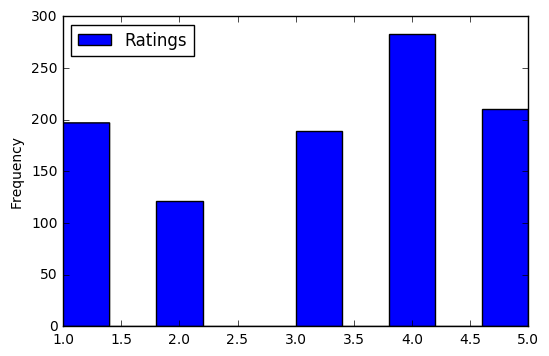

In [26]:
star_hist = pd.DataFrame({'Ratings':stars})
star_hist.plot.hist()

### Now let's try to build a simple linear support vector machine

In [29]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.linear_model import SGDClassifier

In [44]:
train_reviews = reviews[0:800]
test_reviews = reviews[800:1000]
train_ratings = stars[0:800]

In [55]:
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 200) 

train_data_features = vectorizer.fit_transform(train_reviews)
test_data_features = vectorizer.transform(test_reviews)

In [56]:
lin_svm = svm.LinearSVC(multi_class='crammer_singer')
lin_svm = lin_svm.fit(train_data_features, train_ratings)
lin_svm_result = lin_svm.predict(test_data_features)

output = pd.DataFrame( data={"Reviews": test_reviews, "Rating": stars[800:1000], "Predicted_Rating":lin_svm_result} )
output['Lin_SVM_Accurate'] = np.where(output['Rating'] == output['Predicted_Rating'], 1, 0)
accurate_percentage = float(sum(output['Lin_SVM_Accurate']))/float(len(output))

print accurate_percentage

0.43


In [59]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()[0:200]
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    #create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()

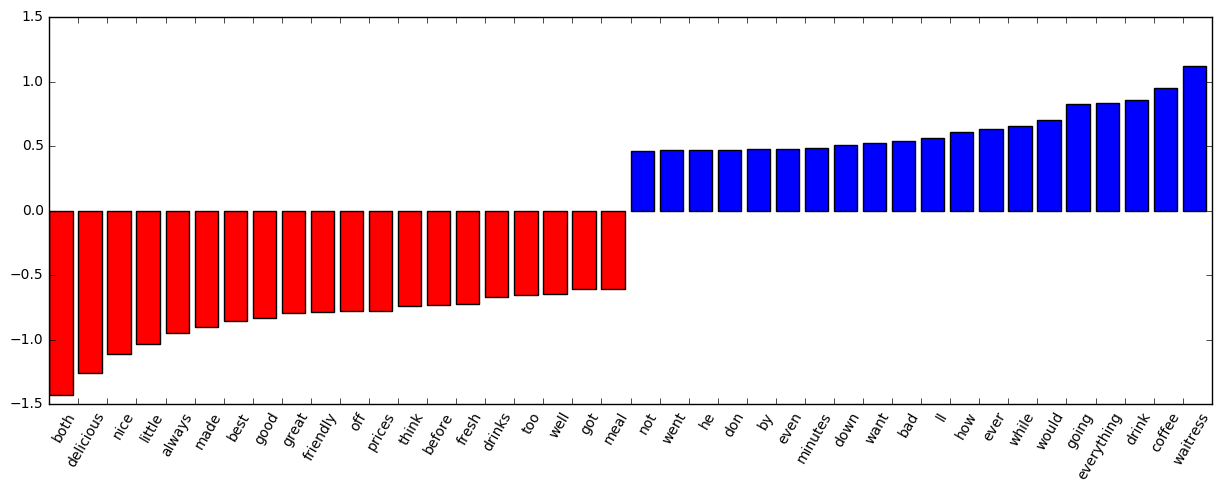

In [60]:
plot_coefficients(lin_svm, vectorizer.get_feature_names())